<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Deep-RNN-TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Initialize TF-2.x:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print('We\'re using TF-{}.'.format(tf.__version__))

# Colab Auto Click: https://paste.ubuntu.com/p/R78fGBJbjb/

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
We're using TF-2.1.0.


In [0]:
# Deep Neural Networks:
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalMaxPool1D, GlobalMaxPool2D,
                                     SimpleRNN, LSTM, GRU, Embedding)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)
from tensorflow.keras.layers import concatenate

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, mean_squared_error)

#Utilities
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical as labelEncoding # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model                      # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

In [0]:
def lossPlot(result):
    plt.title(label='Loss: Training and Validation')
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(result):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

### Time Series Analysis (Autoregressive Linear Model):

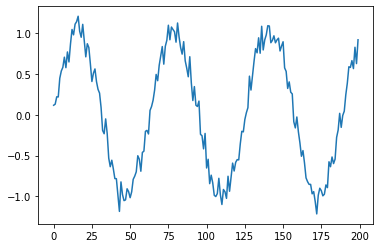

In [0]:
series = np.sin(0.1*np.arange(200)) + (np.random.randn(200)*0.1)

plt.plot(series)
plt.show()

In [0]:
# (len(series) - 10) + 1
T = 10

X = []
Y = []
for t in range(len(series)-10):
    x = series[t:t+T]
    X.append(x)

    y = series[t+T]
    Y.append(y)
#end-for

In [0]:
# X = np.array(X).reshape(-1, T)
# Y = np.array(Y)

print(np.array(X).shape) # (190, 10)
print(np.array(X)[0])

print(np.array(X).reshape(-1, T).shape) # (190, 10)
print(np.array(X).reshape(-1, T)[0]) # (190, 10)


X = np.array(X).reshape(-1, T) # (190, 10)
Y = np.array(Y)

print(Y)
print(Y.shape)

(190, 10)
[0.11698391 0.13061515 0.22033325 0.21905399 0.44866465 0.53799638
 0.58192572 0.70720016 0.57828638 0.77123281]
(190, 10)
[0.11698391 0.13061515 0.22033325 0.21905399 0.44866465 0.53799638
 0.58192572 0.70720016 0.57828638 0.77123281]
[ 0.6484806   0.86961039  1.04703055  0.98148497  1.11203551  1.14304838
  1.2095794   1.02499105  0.95167744  1.11002887  0.90340161  0.71118439
  0.87205008  0.82490516  0.62446106  0.40860682  0.51001897  0.56254803
  0.40678599  0.31212144  0.26599254  0.08859041 -0.19239824 -0.23292191
 -0.05070015 -0.23083705 -0.53149305 -0.63758294 -0.55801594 -0.66245278
 -0.78303357 -0.78481739 -0.98408864 -1.18620531 -0.82409893 -0.97928472
 -1.05405543 -1.04444872 -0.90856704 -0.94378025 -1.01801012 -0.94633914
 -0.79229356 -0.75363923 -0.7001093  -0.50291457 -0.54614427 -0.69313566
 -0.46256703 -0.44642249 -0.20329065 -0.19153601 -0.23546488  0.05341236
  0.10137234  0.17787607  0.30297009  0.4952009   0.41819367  0.60759029
  0.72116675  0.83746554

In [0]:
def Network():
    i = Input(shape=(T,))
    x = Dense(units=1)(i)

    return Model(inputs=[i], outputs=[x])
#end-def

In [0]:
model = Network()

# Compile the model:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse',
)

In [0]:
N = len(X)
# train the RNN
result = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 2ms/sample - loss: 1.0347 - val_loss: 0.7417
Epoch 2/80
95/95 [==============================] - 0s 188us/sample - loss: 0.7153 - val_loss: 0.3579
Epoch 3/80
95/95 [==============================] - 0s 200us/sample - loss: 0.2665 - val_loss: 0.1867
Epoch 4/80
95/95 [==============================] - 0s 199us/sample - loss: 0.2070 - val_loss: 0.1159
Epoch 5/80
95/95 [==============================] - 0s 163us/sample - loss: 0.0703 - val_loss: 0.0282
Epoch 6/80
95/95 [==============================] - 0s 185us/sample - loss: 0.0606 - val_loss: 0.0832
Epoch 7/80
95/95 [==============================] - 0s 181us/sample - loss: 0.0793 - val_loss: 0.0460
Epoch 8/80
95/95 [==============================] - 0s 176us/sample - loss: 0.0596 - val_loss: 0.0826
Epoch 9/80
95/95 [==============================] - 0s 190us/sample - loss: 0.0800 - val_loss: 0.0526
Epoch 10/80
95/95 [=====================

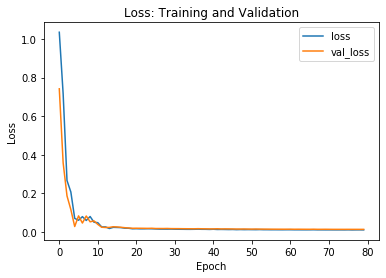

In [0]:
lossPlot(result)

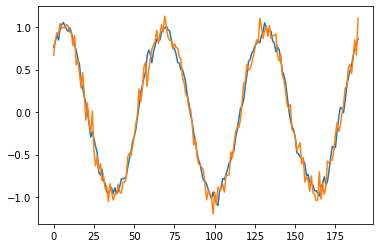

In [0]:
Yp = model.predict(X)
# Yp = model.predict(X[0])
# print(Yp)

# X[0].reshape(1, -1)
# X[0]

# print(Y.reshpe(1, -1))

plt.plot(Yp, label='forecast target')
plt.plot(Y, label='forecast target')

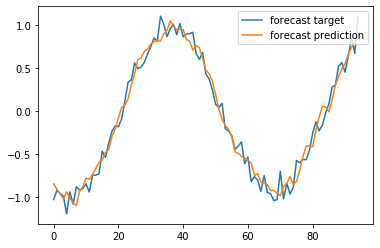

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    # update the predictions list
    validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

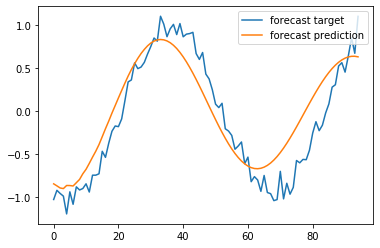

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

### Time Series Analysis (Simple-RNN Model):

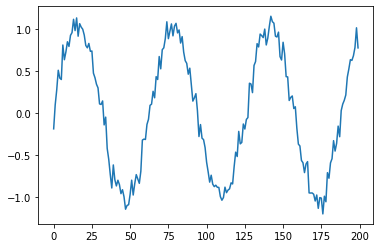

In [0]:
series = np.sin(0.1*np.arange(200)) + (np.random.randn(200)*0.1)

plt.plot(series)
plt.show()

In [0]:
# (len(series) - 10) + 1
T = 10

X = []
Y = []
for t in range(len(series)-10):
    x = series[t:t+T]
    X.append(x)

    y = series[t+T]
    Y.append(y)
#end-for

In [0]:
# X = np.array(X).reshape(-1, T)
# Y = np.array(Y)

print(np.array(X).shape) # (190, 10)
print(np.array(X)[0])

print(np.array(X).reshape(-1, T).shape) # (190, 10)
print(np.array(X).reshape(-1, T)[0]) # (190, 10)


X = np.array(X).reshape(-1, T, 1) # (190, 10)
Y = np.array(Y)

(190, 10)
[-0.18712995  0.09709543  0.27454787  0.50766129  0.41515218  0.39810048
  0.80704021  0.63264741  0.72534836  0.8457074 ]
(190, 10)
[-0.18712995  0.09709543  0.27454787  0.50766129  0.41515218  0.39810048
  0.80704021  0.63264741  0.72534836  0.8457074 ]


In [0]:
def Network():
    i = Input(shape=(T, 1))
    x = SimpleRNN(units=5, activation=None)(i)
    x = Dense(units=1)(x)

    return Model(inputs=[i], outputs=[x])
#end-def

In [0]:
model = Network()

# Compile the model:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse',
)

N = len(X)
# train the RNN
result = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 7ms/sample - loss: 1.5615 - val_loss: 0.3273
Epoch 2/80
95/95 [==============================] - 0s 404us/sample - loss: 0.2822 - val_loss: 0.0955
Epoch 3/80
95/95 [==============================] - 0s 324us/sample - loss: 0.1447 - val_loss: 0.2873
Epoch 4/80
95/95 [==============================] - 0s 355us/sample - loss: 0.2075 - val_loss: 0.1986
Epoch 5/80
95/95 [==============================] - 0s 349us/sample - loss: 0.1106 - val_loss: 0.0427
Epoch 6/80
95/95 [==============================] - 0s 337us/sample - loss: 0.0513 - val_loss: 0.0638
Epoch 7/80
95/95 [==============================] - 0s 398us/sample - loss: 0.0628 - val_loss: 0.0619
Epoch 8/80
95/95 [==============================] - 0s 359us/sample - loss: 0.0565 - val_loss: 0.0414
Epoch 9/80
95/95 [==============================] - 0s 385us/sample - loss: 0.0326 - val_loss: 0.0244
Epoch 10/80
95/95 [=====================

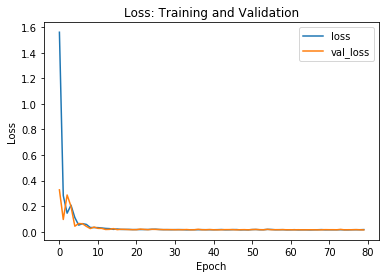

In [0]:
lossPlot(result)

(190, 1)


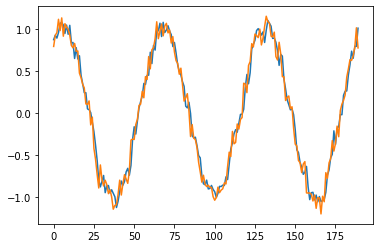

In [0]:
Yp = model.predict(X)

plt.plot(Yp, label='forecast target')
plt.plot(Y, label='forecast target')
print(Yp.shape)

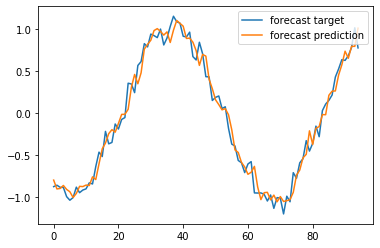

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
    i += 1
    
    # update the predictions list
    validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

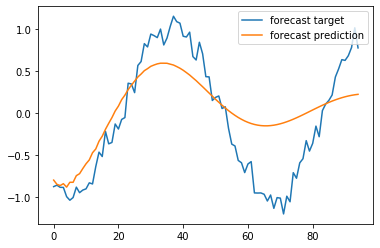

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# X[-N//2:], Y[-N//2:]

Ypro = model.predict(X[-N//2:])
mean_squared_error(y_true=Y[-N//2:], y_pred=Ypro)

0.014097366535595035

In [0]:
model.evaluate(X[-N//2:], Y[-N//2:])

95/95 [==============================] - 0s 112us/sample - loss: 0.0141


0.014097365805585134

### Shapes:

In [0]:
# Make some data
M = 5
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D)

In [0]:
X.shape

(1, 10, 3)

In [0]:
# def Network():
#     i1 = Input(shape=(T, D))
#     x1 = SimpleRNN(units=M, activation='tanh', name='SRR')(i1)
#     # o1 = Dense(units=K, activation='softmax')(x)

#     i2 = Input(shape=(T, D))
#     x2 = SimpleRNN(units=M, activation='tanh')(i2)
#     # o2 = Dense(units=K, activation='softmax')(x)

#     merge = concatenate(inputs=[x1, x2])

#     o = Dense(units=K, activation='softmax')(merge)

#     return Model(inputs=[i1, i2], outputs=[o])
# #end-def



def Network():
    i = Input(shape=(T, D))
    x = SimpleRNN(units=M, activation='tanh', name='SRR')(i)
    o = Dense(units=K, activation='softmax')(x)

    return Model(inputs=[i], outputs=[o])
#end-def

In [0]:
model = Network()


# Compile the model:
# model.compile(optimizer=Adam(learning_rate=0.1),
#               loss='mse',
# )

# N = len(X)
# # train the RNN
# result = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 10, 3)]           0         
_________________________________________________________________
SRR (SimpleRNN)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


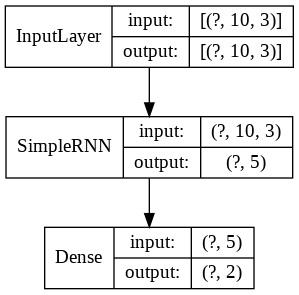

In [0]:
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [0]:
Yp = model.predict(X)
Yp

array([[0.41638738, 0.58361256]], dtype=float32)

In [0]:
Yp.shape

(1, 2)

In [0]:
model.layers[1].get_weights()

[array([[-0.5630126 ,  0.53301054, -0.16895378,  0.48277956,  0.13434702],
        [-0.5938354 , -0.4950746 ,  0.6448886 , -0.86565334,  0.10996133],
        [ 0.7045017 ,  0.02515835,  0.5433342 ,  0.6685826 , -0.53440654]],
       dtype=float32),
 array([[ 0.07151985,  0.15278205, -0.17670052,  0.9448844 ,  0.21797405],
        [-0.69708836, -0.04292319, -0.3160839 ,  0.1449026 , -0.62555546],
        [ 0.28774813,  0.6507063 ,  0.41895235,  0.08017315, -0.55842054],
        [-0.65144026,  0.30632663,  0.5446727 ,  0.00238133,  0.43025059],
        [ 0.04218344, -0.67643225,  0.62982416,  0.28242347, -0.25341374]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [0]:
model.layers[2].get_weights()

[array([[ 0.9171164 , -0.22234803],
        [ 0.03376043,  0.78353333],
        [-0.05277765,  0.77953243],
        [-0.60951257,  0.07227409],
        [ 0.10740924, -0.11352837]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [0]:
Wx, Wh, bh = model.layers[1].get_weights()
print('Wx --> {}'.format(Wx.shape))
print('Wh --> {}'.format(Wh.shape))
print('bh --> {}'.format(bh.shape))

Wx --> (3, 5)
Wh --> (5, 5)
bh --> (5,)


In [0]:
Wo, bo = model.layers[2].get_weights()
print('Wo --> {}'.format(Wo.shape))
print('bo --> {}'.format(bo.shape))

Wo --> (5, 2)
bo --> (2,)


In [0]:
x = X[0]
h = np.zeros((M))
Yp = []
for i in range(T):
    h = np.tanh(np.dot(x[i], Wx) + np.dot(h, Wh) + bh)
    y = np.dot(h, Wo) + bo
    Yp.append(y)
#end-for
print(Yp[-1])

[[-0.97234251 -0.63472122]]


In [0]:
Yp

[array([[-1.16173854,  0.29898115]]),
 array([[-0.48030185,  0.41625105]]),
 array([[ 0.71213562, -0.05498733]]),
 array([[ 0.9851346 , -0.22950515]]),
 array([[ 0.17690008, -0.04004809]]),
 array([[-0.84757189,  0.19204209]]),
 array([[-0.22477208,  0.33436987]]),
 array([[ 0.58709299, -0.54747245]]),
 array([[ 0.78598762, -1.36581672]]),
 array([[-0.97234251, -0.63472122]])]

### LSTM, GRU, Simple RNN:

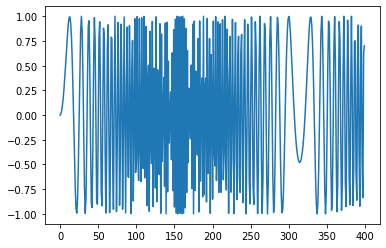

In [0]:
# x(t) = sin((Ωt)^2)
t = np.arange(400)
series = np.sin((0.1*t)**2.0) # (np.random.randn(200)*0.1)

plt.plot(series)
plt.show()

In [0]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
#end-for

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
# Y = labelEncoding(Y, dtype=int)

N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [0]:
X.shape

(390, 10)

#### Auto Regressive Linear:

In [0]:
### try autoregressive linear model

def Network():
    i = Input(shape=(T,))
    # x = LSTM(units=10)(i)
    x = Dense(units=1)(i)
    return Model(i, x)
#end-def

model = Network()

model.compile(loss='mse', optimizer=Adam(lr=0.01))


# train the RNN
result = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=200)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 0s 1ms/sample - loss: 1.6130 - val_loss: 0.5760
Epoch 2/200
195/195 [==============================] - 0s 191us/sample - loss: 1.3127 - val_loss: 0.5730
Epoch 3/200
195/195 [==============================] - 0s 176us/sample - loss: 1.1149 - val_loss: 0.5691
Epoch 4/200
195/195 [==============================] - 0s 188us/sample - loss: 0.9226 - val_loss: 0.5582
Epoch 5/200
195/195 [==============================] - 0s 232us/sample - loss: 0.8213 - val_loss: 0.5530
Epoch 6/200
195/195 [==============================] - 0s 178us/sample - loss: 0.7258 - val_loss: 0.5520
Epoch 7/200
195/195 [==============================] - 0s 162us/sample - loss: 0.6625 - val_loss: 0.5503
Epoch 8/200
195/195 [==============================] - 0s 171us/sample - loss: 0.6185 - val_loss: 0.5541
Epoch 9/200
195/195 [==============================] - 0s 159us/sample - loss: 0.5822 - val_loss: 0.5593
Epoch 10/20

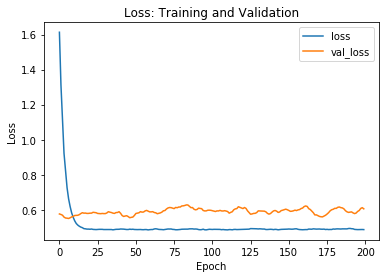

In [0]:
lossPlot(result)

(390, 1)


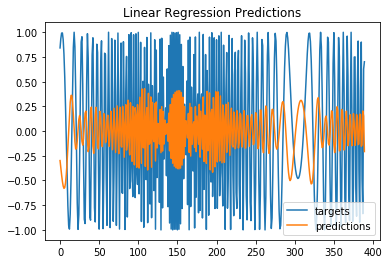

In [0]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

#### LSTM, GRU, Simpe RNN:

In [0]:
X = X.reshape(-1, T, 1)

In [0]:
### try autoregressive linear model

def Network():
    i = Input(shape=(T, 1))
    # x = SimpleRNN(units=10)(i)
    # x = LSTM(units=10)(i)
    x = GRU(units=5)(i)
    x = Dense(units=1)(x)
    return Model(i, x)
#end-def

model = Network()

model.compile(loss='mse', optimizer=Adam(lr=0.01))


# train the RNN
result = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=200)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 7s 37ms/sample - loss: 0.5390 - val_loss: 0.5539
Epoch 2/200
195/195 [==============================] - 0s 272us/sample - loss: 0.5110 - val_loss: 0.5546
Epoch 3/200
195/195 [==============================] - 0s 203us/sample - loss: 0.5054 - val_loss: 0.5871
Epoch 4/200
195/195 [==============================] - 0s 203us/sample - loss: 0.4966 - val_loss: 0.6241
Epoch 5/200
195/195 [==============================] - 0s 210us/sample - loss: 0.5037 - val_loss: 0.6326
Epoch 6/200
195/195 [==============================] - 0s 220us/sample - loss: 0.5043 - val_loss: 0.6137
Epoch 7/200
195/195 [==============================] - 0s 231us/sample - loss: 0.4951 - val_loss: 0.5984
Epoch 8/200
195/195 [==============================] - 0s 212us/sample - loss: 0.4931 - val_loss: 0.6125
Epoch 9/200
195/195 [==============================] - 0s 214us/sample - loss: 0.5033 - val_loss: 0.6431
Epoch 10/2

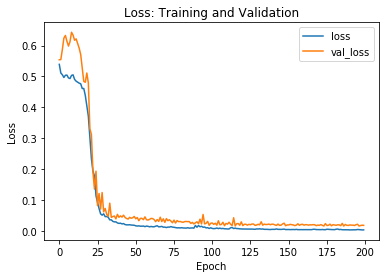

In [0]:
lossPlot(result)

(390, 1)


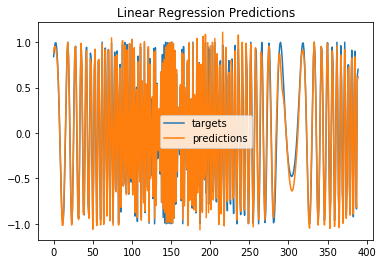

In [0]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

(390, 1)


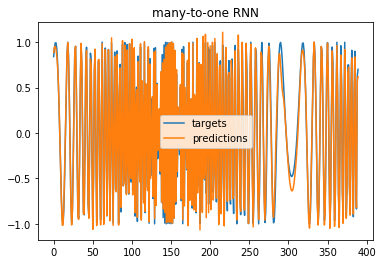

In [0]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

### Long-distance vs Short-distance Pattern:

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0: return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0: return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0: return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0: return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y = get_label(x, -1, -2, -3) # short distance
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)
print(N)

(5000, 30)
(5000,)
5000


In [0]:
Y = labelEncoding(Y, dtype=int)
Y.shape

(5000, 2)

In [0]:
X = X.reshape(-1, T, 1)
X.shape

(5000, 30, 1)

In [0]:
def Network():
    i = Input(shape=(T, D)) # D=1
    # x = SimpleRNN(units=5, activation='tanh')(i)
    x = LSTM(units=5, activation='tanh', return_sequences=True)(i)
    print(x.shape)

    x = GlobalMaxPool1D()(x)
    print(x.shape)

    x = Dense(units=2, activation='softmax')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()

model.compile(loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

(None, 30, 5)
(None, 5)


In [0]:
# train the network
result = model.fit(X, Y, validation_split=0.5, epochs=100)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 689us/sample - loss: 0.6964 - accuracy: 0.4964 - val_loss: 0.6938 - val_accuracy: 0.5048
Epoch 2/100
2500/2500 [==============================] - 1s 226us/sample - loss: 0.6950 - accuracy: 0.4904 - val_loss: 0.6940 - val_accuracy: 0.5076
Epoch 3/100
2500/2500 [==============================] - 1s 246us/sample - loss: 0.6945 - accuracy: 0.5016 - val_loss: 0.6953 - val_accuracy: 0.4960
Epoch 4/100
2500/2500 [==============================] - 1s 213us/sample - loss: 0.6938 - accuracy: 0.5220 - val_loss: 0.6916 - val_accuracy: 0.5200
Epoch 5/100
2500/2500 [==============================] - 1s 236us/sample - loss: 0.6919 - accuracy: 0.5216 - val_loss: 0.7017 - val_accuracy: 0.5092
Epoch 6/100
2500/2500 [==============================] - 1s 222us/sample - loss: 0.6933 - accuracy: 0.5132 - val_loss: 0.6908 - val_accuracy: 0.5324
Epoch 7/100
2500/2500 [==============================] - 1

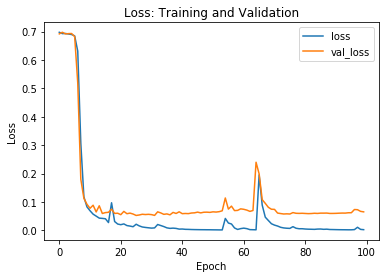

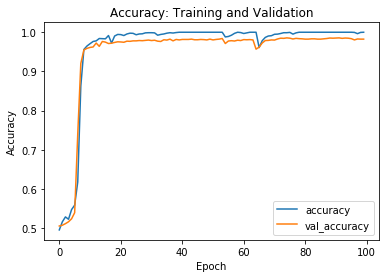

In [0]:
lossPlot(result)
accuracyPlot(result)

In [0]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[-0.03714859]]


In [0]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[0.02313283]
  [0.06362367]
  [0.11643628]]]


In [0]:
help(LSTM.__init__)

Help on function __init__ in module tensorflow.python.keras.layers.recurrent_v2:

__init__(self, units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, go_backwards=False, stateful=False, time_major=False, unroll=False, **kwargs)



### RNN for Image Classification:

#### MNIST Handwriting:

In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
_, T, D = x_train.shape
print(T, D)

28 28


In [0]:
y_train = labelEncoding(y_train, dtype=int)
y_test  = labelEncoding(y_test, dtype=int)

In [0]:
def Network():
    i = Input(shape=(T, D)) # D=1
    # x = SimpleRNN(units=128, activation='tanh')(i)   # Can't!
    # x = GRU(units=128, activation='tanh')(i)         # Excellent Performance!
    x = LSTM(units=128, activation='tanh')(i)          # Excellent Performance!

    x = Dense(units=10, activation='softmax')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()

model.compile(loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

In [0]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 56s 937us/sample - loss: 0.2522 - accuracy: 0.9229 - val_loss: 0.1048 - val_accuracy: 0.9701
Epoch 2/5
60000/60000 [==============================] - 54s 906us/sample - loss: 0.1099 - accuracy: 0.9678 - val_loss: 0.0913 - val_accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 55s 913us/sample - loss: 0.1030 - accuracy: 0.9708 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 4/5
60000/60000 [==============================] - 56s 934us/sample - loss: 0.0890 - accuracy: 0.9740 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 5/5
60000/60000 [==============================] - 56s 938us/sample - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.1102 - val_accuracy: 0.9670


#### MNIST Fashion:

In [0]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = x_train.reshape(-1, 1024, 3)

In [0]:
x_train.shape

(50000, 1024, 3)

In [0]:
x_test = x_test.reshape(-1, 1024, 3)

In [0]:
y_train = labelEncoding(y_train, dtype=int)
y_test  = labelEncoding(y_test, dtype=int)

In [0]:
def Network():
    i = Input(shape=(1024, 3)) # D=3
    # x = SimpleRNN(units=128, activation='tanh')(i)   # Can't!
    # x = GRU(units=128, activation='tanh')(i)         # Excellent Performance!
    x = LSTM(units=128, activation='tanh')(i)          # Excellent Performance!

    x = Dense(units=10, activation='softmax')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()

model.compile(loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

In [0]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1602s 32ms/sample - loss: 2.1411 - accuracy: 0.2045 - val_loss: 2.0689 - val_accuracy: 0.2379
Epoch 2/5
50000/50000 [==============================] - 1629s 33ms/sample - loss: 2.0981 - accuracy: 0.2283 - val_loss: 2.0791 - val_accuracy: 0.2369
Epoch 3/5
50000/50000 [==============================] - 1620s 32ms/sample - loss: 2.0785 - accuracy: 0.2274 - val_loss: 2.0754 - val_accuracy: 0.2362
Epoch 4/5
34240/50000 [===================>..........] - ETA: 8:07 - loss: 2.0646 - accuracy: 0.2372

KeyboardInterrupt: ignored